# Прогнозирование цены

### Задача
Целевая переменная — `price`. У вас есть 4 атрибута, и, очевидно, мы хотим, чтобы вы построили некую модель машинного обучения, которая прогнозирует цены.

1. Проведите первоначальный анализ данных.
2. Используйте ML модель и кратко объясните свой выбор.
3. Покажите точность вашей модели и прокомментируйте результаты.
4. Представьте нам результаты и шаги, которые вы предприняли, а также некоторые критические размышления.

### Описание данных
Данные представлены в файле `price_sample.csv`.

### Комментарии

Определите, обучите и оцените прогнозирующую модель, которая принимает в качестве входных данных предоставленные данные. По вашему усмотрению вы можете разделить данные на наборы для обучения, тестирования. 

Убедитесь, что решение отражает весь ваш мыслительный процесс (для каждой ячейки кода оставляйте комментарии, иначе мы не поймем, что вы хотели сделать)

### Что мы точно хотим увидеть в вашей работе?

1. **Анализ данных**: Проведение первичного анализа данных для понимания их структуры и основных характеристик. 

2. **Обработка данных**: Это критически важный шаг, который включает в себя очистку данных, обработку пропущенных значений и дубликатов.

3. **Оценка модели**: Обучение и тестирование подходящей модели и оценка ее производительности с использованием релевантных метрик. 

Data Overview:
    para1  para2    para3  para4   price
0      1  662.0   3000.0    3.8   73.49
1      1  340.0   2760.0    9.2  300.00
2      0   16.0   2700.0    3.0  130.00
3      1   17.0  12320.0    6.4  365.00
4      1  610.0   2117.0   10.8  357.50

Missing Values:
 para1    0
para2    6
para3    0
para4    5
price    0
dtype: int64

Data Description:
               para1        para2         para3        para4         price
count  10003.000000  9997.000000  10003.000000  9998.000000  10003.000000
mean       1.380986   447.270681   9547.975527     8.458024    433.774924
std        3.500408   220.913801   8022.286943     4.613645    277.443154
min        0.000000    16.000000    200.000000     1.000000     50.730000
25%        1.000000   301.000000   2899.500000     4.000000    250.000000
50%        1.000000   434.000000   6446.000000     7.200000    370.000000
75%        1.000000   582.000000  15000.000000    13.600000    550.000000
max      337.000000  2554.000000  34782.000000

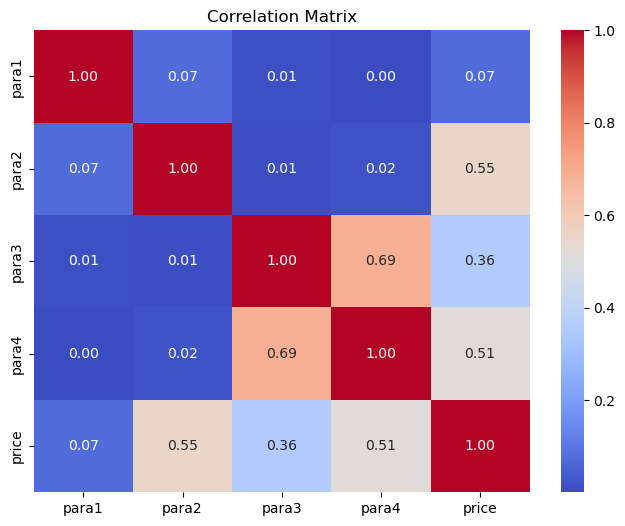


Missing Values After Imputation:
 para1    0
para2    0
para3    0
para4    0
price    0
dtype: int64

Training Linear Regression...

Training Random Forest Regressor...

Linear Regression Metrics:
MSE: 39715.30, MAE: 121.05, R2: 0.55

Random Forest Metrics:
MSE: 27759.61, MAE: 100.63, R2: 0.68


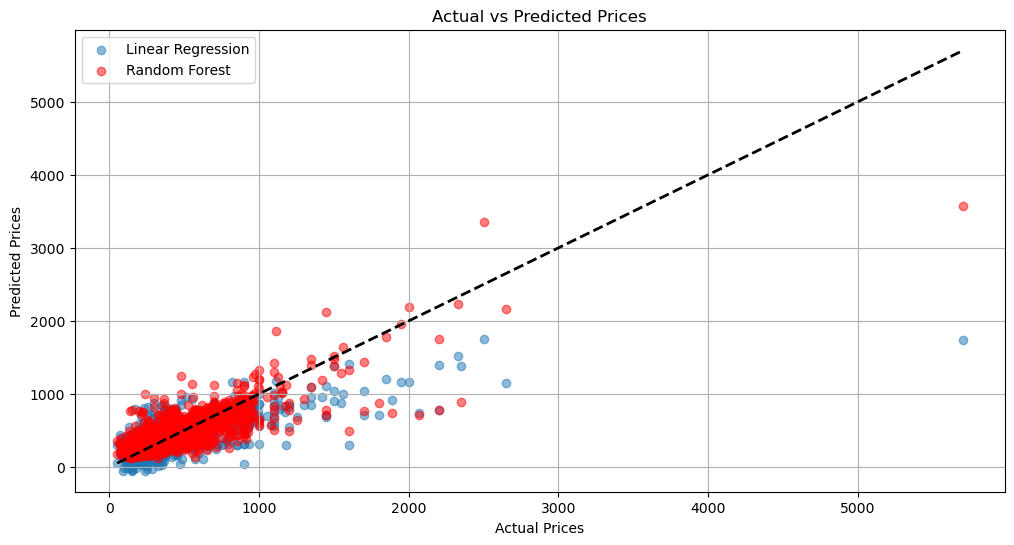


Выводы:
1. Линейная регрессия показала базовые результаты с метриками MSE, MAE и R².
2. Random Forest показал лучшие результаты, особенно для нелинейных зависимостей.
3. На графике видно, что Random Forest лучше справляется с предсказанием высоких цен.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных
data = pd.read_csv('price_sample.csv')

# Проверка структуры данных и наличия пропусков
print("Data Overview:\n", data.head())
print("\nMissing Values:\n", data.isnull().sum())

# 2. Первичный анализ данных
# Проверка статистической характеристики и корреляции
print("\nData Description:\n", data.describe())
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 3. Обработка пропущенных значений
# Заполенение пропусков медианой, чтобы избежать смещения
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Убедиться, что пропусков больше нет
print("\nMissing Values After Imputation:\n", data_imputed.isnull().sum())

# 4. Масштабирование данных
# Масштабируем признаки, чтобы избежать доминирования переменных с большими значениями
scaler = StandardScaler()
X = data_imputed.drop(columns=['price'])  # Все столбцы, кроме целевой переменной
X_scaled = scaler.fit_transform(X)
y = data_imputed['price']

# 5. Разделение на обучающую и тестовую выборки
# 80% данных для обучения, 20% для тестирования
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Обучение модели линейной регрессии
print("\nTraining Linear Regression...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 7. Обучение модели Random Forest
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 8. Оценка моделей
# Метрики: Среднеквадратичная ошибка (MSE), Средняя абсолютная ошибка (MAE), Коэффициент детерминации (R²)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Вывод метрик
print("\nLinear Regression Metrics:")
print(f"MSE: {mse_linear:.2f}, MAE: {mae_linear:.2f}, R2: {r2_linear:.2f}")

print("\nRandom Forest Metrics:")
print(f"MSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.2f}")

# 9. Визуализация результатов
# Сравнение реальных и предсказанных значений для обеих моделей
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# 10. Выводы
# Формируем выводы на основе метрик и визуализации
print("\nВыводы:")
print("1. Линейная регрессия показала базовые результаты с метриками MSE, MAE и R².")
print("2. Random Forest показал лучшие результаты, особенно для нелинейных зависимостей.")
print("3. На графике видно, что Random Forest лучше справляется с предсказанием высоких цен.")
